In [4]:
#url: https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [3]:
!pip install sentence_transformers


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120751 sha256=5cdf1391e48a80876874b90ff607af7a6a02da120573445892d3fbea3d3893c3
  Stored in directory: c:\users\reyum\appdata\local\pip\cache\wheels\2b\11\3b\32a18fb9f2253b25d3d1a06f0a84e2d516e7efa19c8c71a283
Successfully built sentence-transformers


In [5]:
data = pd.read_csv('imdb_top_1000.csv')
X = np.array(data.Overview)

In [6]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
data = data[['Genre','Overview','Series_Title']]
data.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [8]:
data = data.dropna()

In [9]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [10]:
embed_data = embeddings

In [11]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986176,1.695293,4.334512,-2.355224,2.234913
1,-0.131723,0.887956,4.695527,-2.713955,-1.791507
2,-5.688407,-1.776793,-0.750772,-0.705733,4.125245
3,-1.211439,4.458769,1.582485,-3.536599,-2.344503
4,-0.971361,-2.374374,3.172302,3.073554,-0.172710


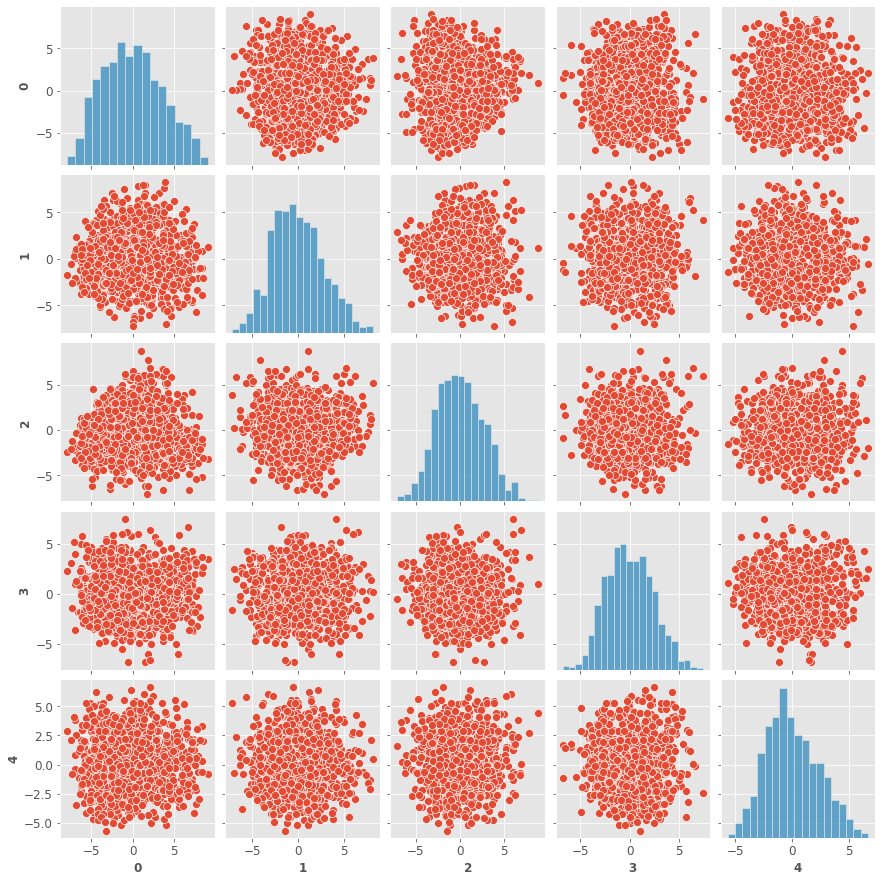

In [12]:
sns.pairplot(pca_data)

In [13]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

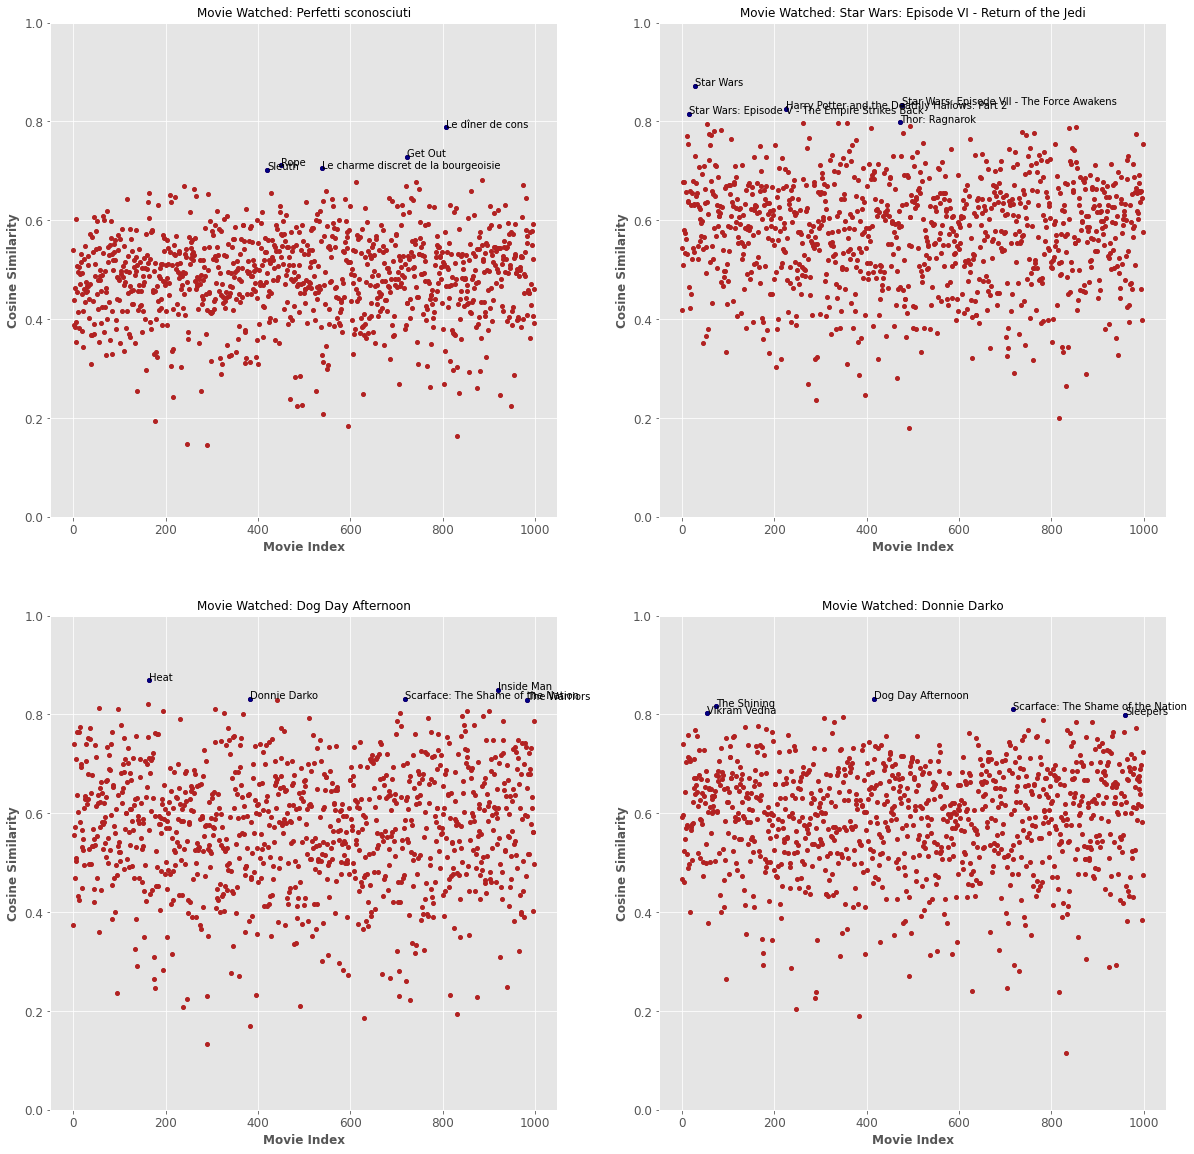

In [14]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [15]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [16]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [17]:
give_recommendations(10,True,True)

The watched movie is this one: The Lord of the Rings: The Fellowship of the Ring 

The number 1 recommended movie is this one: The Lord of the Rings: The Return of the King 

The number 1 recommended movie is this one: Harry Potter and the Deathly Hallows: Part 2 

The number 1 recommended movie is this one: The Hobbit: An Unexpected Journey 

The number 1 recommended movie is this one: Star Wars: Episode VII - The Force Awakens 

The number 1 recommended movie is this one: The Hobbit: The Desolation of Smaug 

The plot of the watched movie is this one:
 A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron. 

The plot of the number 1 recommended movie is this one:
 Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring. 

The plot of the number 2 recommended movie is this one:
 Harry, Ron, and Hermi

{'Movies': array(['The Lord of the Rings: The Return of the King',
        'Harry Potter and the Deathly Hallows: Part 2',
        'The Hobbit: An Unexpected Journey',
        'Star Wars: Episode VII - The Force Awakens',
        'The Hobbit: The Desolation of Smaug'], dtype=object),
 'Index': [5, 226, 618, 477, 609]}

In [18]:
give_recommendations(65,True,True,True)

The watched movie is this one: Taare Zameen Par 

The number 1 recommended movie is this one: Jagten 

The number 1 recommended movie is this one: What's Eating Gilbert Grape 

The number 1 recommended movie is this one: Scent of a Woman 

The number 1 recommended movie is this one: The Boy in the Striped Pyjamas 

The number 1 recommended movie is this one: Harry Potter and the Sorcerer's Stone 

The plot of the watched movie is this one:
 An eight-year-old boy is thought to be a lazy trouble-maker, until the new art teacher has the patience and compassion to discover the real problem behind his struggles in school. 

The plot of the number 1 recommended movie is this one:
 A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie. 

The plot of the number 2 recommended movie is this one:
 A young man in a 

{'Movies': array(['Jagten', "What's Eating Gilbert Grape", 'Scent of a Woman',
        'The Boy in the Striped Pyjamas',
        "Harry Potter and the Sorcerer's Stone"], dtype=object),
 'Index': [88, 658, 398, 616, 947]}

In [19]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [20]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
731,The Fault in Our Stars,Spoorloos,Viskningar och rop,Hedwig and the Angry Inch,Taken,50/50
850,Enter the Dragon,The Warriors,Yôjinbô,Casino Royale,Vikram Vedha,The 39 Steps
962,Sense and Sensibility,Barry Lyndon,Mommy,Gifted,En man som heter Ove,The Night of the Hunter
473,Thor: Ragnarok,Guardians of the Galaxy,The Avengers,X-Men: Days of Future Past,Harry Potter and the Deathly Hallows: Part 2,Star Trek Into Darkness
552,The Ten Commandments,Baahubali 2: The Conclusion,Finding Neverland,La vita è bella,Forrest Gump,Ben-Hur


In [21]:
!pip install jovian

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=fa8f94d4465243d5271aae15aea4f5ce8e9117abc8327e3bad379a47329cc2c5
  Stored in directory: c:\users\reyum\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: